In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# configure df options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

pd.options.display.float_format = '{:,.5f}'.format

In [3]:
import warnings
warnings.filterwarnings("ignore")

### Read samples from one station

In [4]:
station_code = 'SONDOC'

value_field = 'max'

#### Read true raw samples

In [5]:
df = pd.read_csv('../../dataset/final/bentre-cleaned.csv', parse_dates=['date'])

In [6]:
df.set_index('date', inplace=True)

In [7]:
df = df[df['code'] == station_code]

In [8]:
# How samples distributed
df.groupby(df.index.year).count()

,code,min,max,x,y,cm
date,,,,,,
2002,181,181,181,181,181,181
2003,181,181,181,181,181,181
2004,182,182,182,182,182,182
2005,181,181,181,181,181,181
2006,181,181,181,181,181,181
2007,181,181,181,181,181,181
2008,182,182,182,182,182,182
2009,181,181,181,181,181,181
2010,181,181,181,181,181,181


From 2002 to 2010, samples are completed for dry seasons: 181 for normal years; 182 for leap years (January to June)

2011 and 2018 have samples from January to May (151 days)

2012 to 2016 have less samples, missing dates

2017 has no samples at all

#### Reread prepared train samples

In [9]:
train_df = pd.read_csv(f'../../dataset/final/tops/{station_code}.csv', parse_dates=['date'])

In [10]:
# set index to time-series based 'date'
train_df.set_index('date', inplace=True)

In [11]:
train_df.index

DatetimeIndex(['2002-01-01', '2002-01-02', '2002-01-03', '2002-01-04',
               '2002-01-05', '2002-01-06', '2002-01-07', '2002-01-08',
               '2002-01-09', '2002-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', name='date', length=3287, freq=None)

In [12]:
# can not set index frequency to D - daily due to missing discontinuous timestamps in the dataset
train_df.index.freq = 'D'
train_df.index

DatetimeIndex(['2002-01-01', '2002-01-02', '2002-01-03', '2002-01-04',
               '2002-01-05', '2002-01-06', '2002-01-07', '2002-01-08',
               '2002-01-09', '2002-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', name='date', length=3287, freq='D')

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3287 entries, 2002-01-01 to 2010-12-31
Freq: D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    3287 non-null   object 
 1   min     3287 non-null   float64
 2   max     3287 non-null   float64
dtypes: float64(2), object(1)
memory usage: 102.7+ KB


In [14]:
# sort by date index
train_df.sort_index(inplace=True)

In [15]:
train_df.head()

,code,min,max
date,,,
2002-01-01,SONDOC,0.10000,0.30000
2002-01-02,SONDOC,0.10000,0.40000
2002-01-03,SONDOC,0.20000,0.40000
2002-01-04,SONDOC,0.20000,0.50000
2002-01-05,SONDOC,0.10000,0.60000


In [16]:
train_df.tail()

,code,min,max
date,,,
2010-12-27,SONDOC,0.50000,3.50000
2010-12-28,SONDOC,0.50000,3.60000
2010-12-29,SONDOC,0.40000,3.40000
2010-12-30,SONDOC,0.70000,3.90000
2010-12-31,SONDOC,0.80000,4.50000


### ARIMA Self Help

In [17]:
from statsmodels.tsa.arima_model import ARIMA

In [18]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array_like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array_like, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes
 |  -----
 |

#### Reread prepared test samples
Use 2011

In [19]:
test_year = 2011

In [20]:
test_df = pd.read_csv(f'../../dataset/final/stations/{station_code}.csv', parse_dates=['date'])

In [21]:
test_df.set_index('date', inplace=True)

In [22]:
test_df = test_df[test_df.index.year == test_year]
test_df = test_df[f'{test_year}-01-01':f'{test_year}-05-31']
test_df.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2011-05-22', '2011-05-23', '2011-05-24', '2011-05-25',
               '2011-05-26', '2011-05-27', '2011-05-28', '2011-05-29',
               '2011-05-30', '2011-05-31'],
              dtype='datetime64[ns]', name='date', length=151, freq=None)

In [23]:
test_df.index.freq = 'D'
test_df.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2011-05-22', '2011-05-23', '2011-05-24', '2011-05-25',
               '2011-05-26', '2011-05-27', '2011-05-28', '2011-05-29',
               '2011-05-30', '2011-05-31'],
              dtype='datetime64[ns]', name='date', length=151, freq='D')

#### Resample train and test datasets to monthly data

Train dataset

In [24]:
train_data = train_df[value_field].resample('MS').mean()

In [25]:
train_data.index

DatetimeIndex(['2002-01-01', '2002-02-01', '2002-03-01', '2002-04-01',
               '2002-05-01', '2002-06-01', '2002-07-01', '2002-08-01',
               '2002-09-01', '2002-10-01',
               ...
               '2010-03-01', '2010-04-01', '2010-05-01', '2010-06-01',
               '2010-07-01', '2010-08-01', '2010-09-01', '2010-10-01',
               '2010-11-01', '2010-12-01'],
              dtype='datetime64[ns]', name='date', length=108, freq='MS')

In [26]:
train_data.head()

date
2002-01-01   0.68065
2002-02-01   1.82500
2002-03-01   4.93548
2002-04-01   6.74333
2002-05-01   6.20968
Freq: MS, Name: max, dtype: float64

In [27]:
train_data.tail()

date
2010-08-01   10.29355
2010-09-01   13.93000
2010-10-01   10.11290
2010-11-01    3.43000
2010-12-01    1.61613
Freq: MS, Name: max, dtype: float64

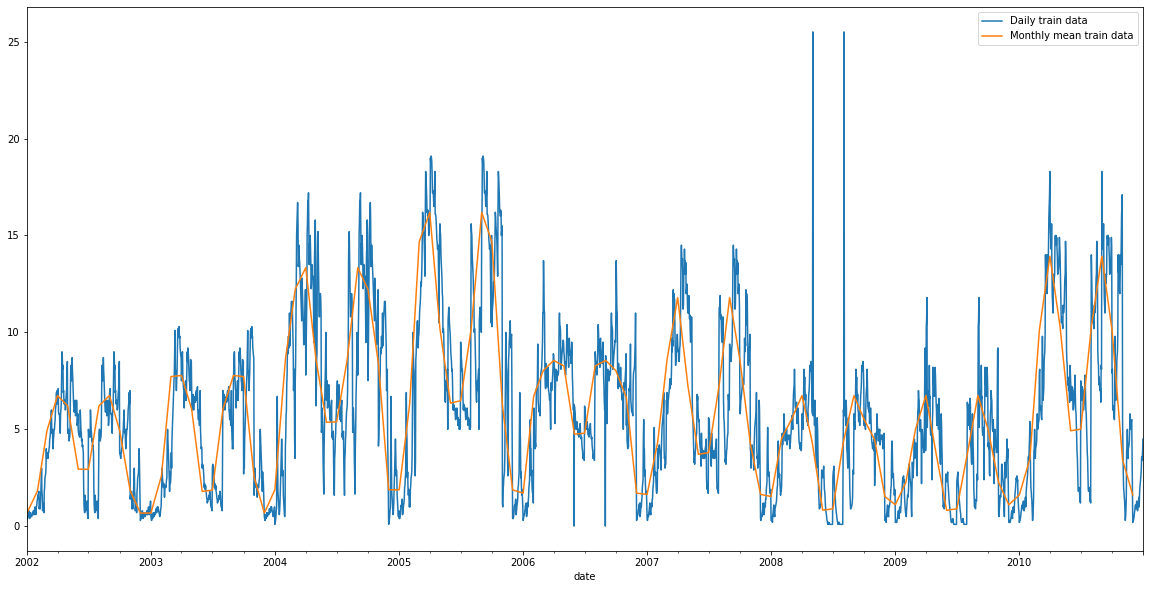

In [28]:
train_df[value_field].plot(label='Daily train data', legend=True)
train_data.plot(figsize=(20, 10), label='Monthly mean train data', legend=True);

Test dataset

In [29]:
test_data = test_df[value_field].resample('MS').mean()

In [30]:
test_data.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01'],
              dtype='datetime64[ns]', name='date', freq='MS')

In [31]:
test_data.head()

date
2011-01-01   3.38710
2011-02-01   5.51786
2011-03-01   9.41290
2011-04-01   9.19000
2011-05-01   5.42903
Freq: MS, Name: max, dtype: float64

In [32]:
test_data.tail()

date
2011-01-01   3.38710
2011-02-01   5.51786
2011-03-01   9.41290
2011-04-01   9.19000
2011-05-01   5.42903
Freq: MS, Name: max, dtype: float64

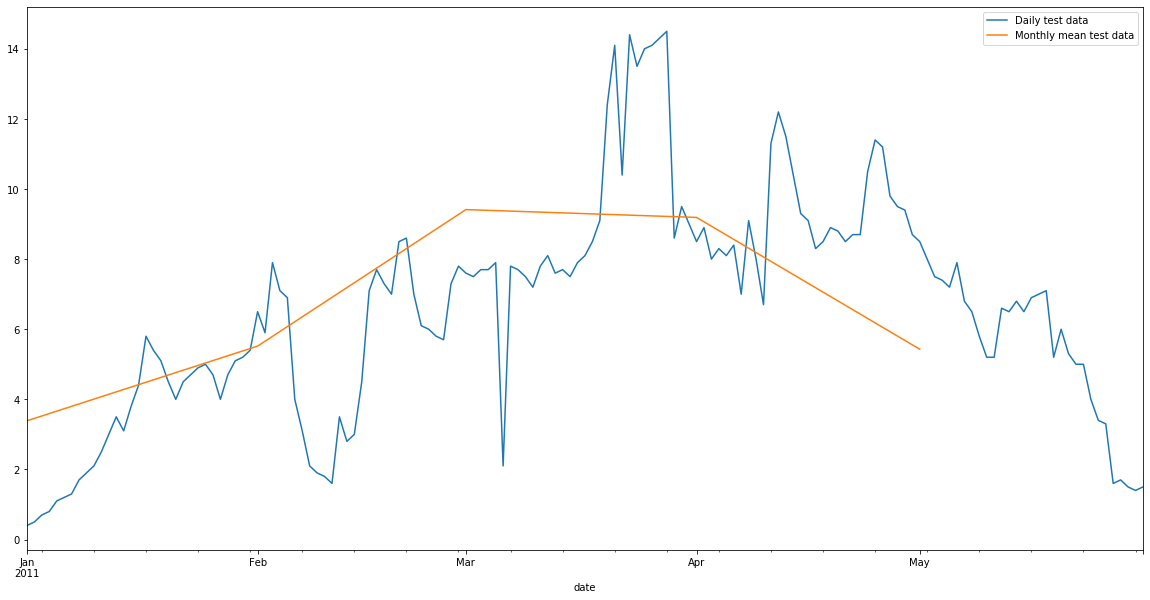

In [33]:
test_df[value_field].plot(label='Daily test data', legend=True)
test_data.plot(figsize=(20, 10), label='Monthly mean test data', legend=True);

Train vs. test datasets

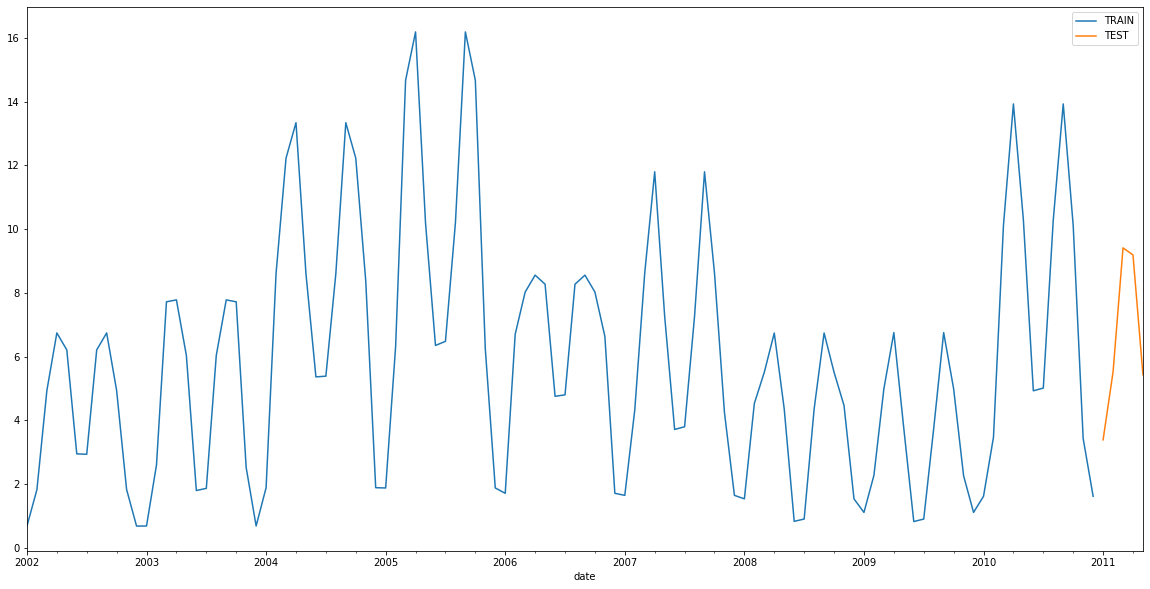

In [34]:
train_data.plot(legend=True, label='TRAIN')
test_data.plot(legend=True, label='TEST', figsize=(20,10));

### Try out some simpler models

In [35]:
# seasonal adjustment
adjustment = 'additive'
#adjustment = 'multiplicative'

In [36]:
# Annual
season_length = 12  #test_data.shape[0]  # same length of test data

season_length

12

1. Holt-Winters method via Exponential Smoothing

In [37]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_model = ExponentialSmoothing(train_data, 
                                trend=adjustment, seasonal=adjustment, 
                                seasonal_periods=season_length).fit()

/home/kenneth/anaconda3/envs/salinization/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [38]:
hw_prediction = hw_model.forecast(len(test_data))

In [39]:
hw_prediction.head(10)

2011-01-01    1.73854
2011-02-01    4.84493
2011-03-01    8.86246
2011-04-01   10.52918
2011-05-01    7.54249
Freq: MS, dtype: float64

In [40]:
hw_prediction.tail(10)

2011-01-01    1.73854
2011-02-01    4.84493
2011-03-01    8.86246
2011-04-01   10.52918
2011-05-01    7.54249
Freq: MS, dtype: float64

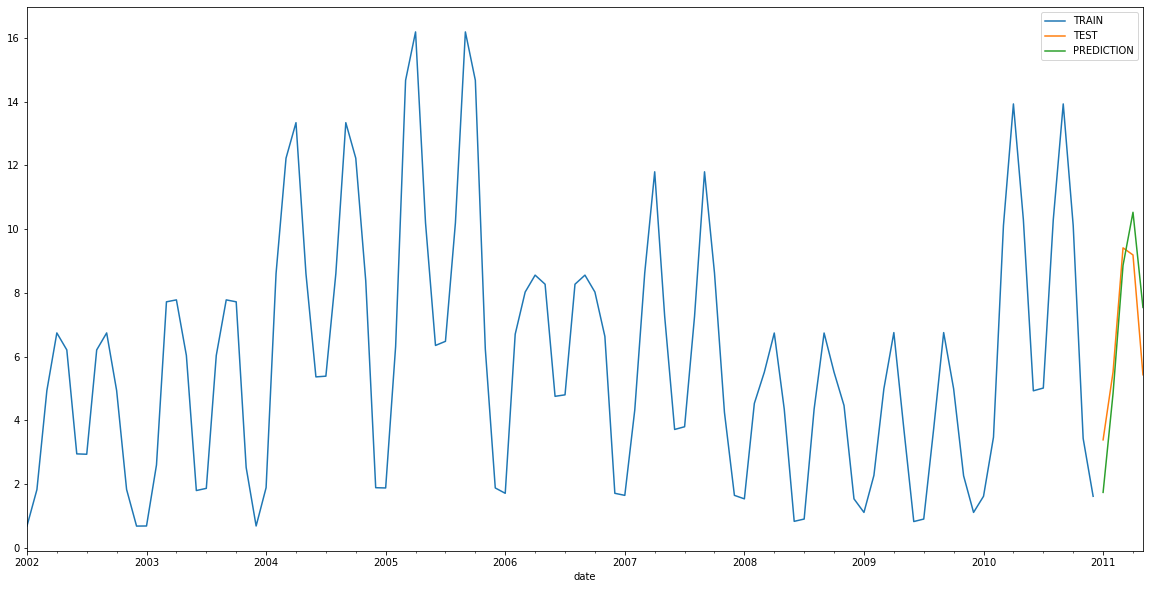

In [41]:
# plot prediction vs. true values
train_data.plot(legend=True, label='TRAIN')
test_data.plot(legend=True, label='TEST')
hw_prediction.plot(legend=True, label='PREDICTION', figsize=(20, 10));

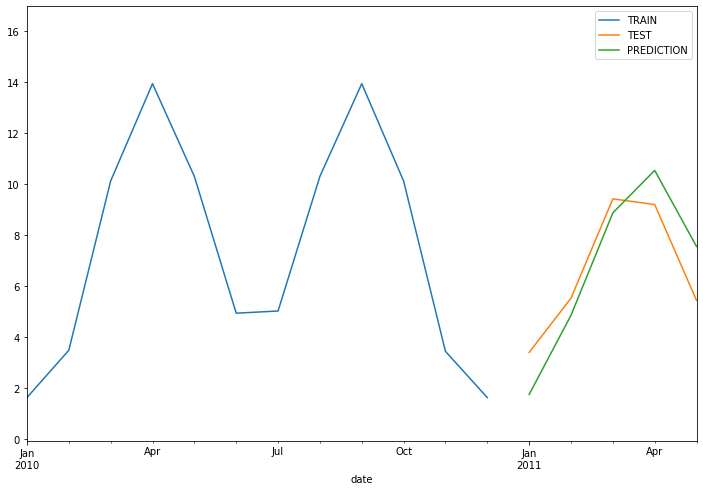

In [42]:
# plot prediction vs. true values on test set (zoomed version)
train_data.plot(legend=True, label='TRAIN')
test_data.plot(legend=True, label='TEST', figsize=(12,8))

hw_prediction.plot(legend=True, label='PREDICTION', xlim=[f'{test_year - 1}-01-01', f'{test_year}-05-31']);

#### Evaluating Prediction against test set

In [43]:
# Option 1: use scikit-learns implementations
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [44]:
test_data.describe()

count   5.00000
mean    6.58738
std     2.62129
min     3.38710
25%     5.42903
50%     5.51786
75%     9.19000
max     9.41290
Name: max, dtype: float64

In [45]:
hw_prediction.describe()

count    5.00000
mean     6.70352
std      3.46792
min      1.73854
25%      4.84493
50%      7.54249
75%      8.86246
max     10.52918
dtype: float64

The average of test data value is: 6.60 while the average of prediction value is: 1.66  

In [46]:
mae = mean_absolute_error(test_data, hw_prediction)

mae

1.264914314958946

In [47]:
mse = mean_squared_error(test_data, hw_prediction)

mse

1.9467360614591018

In [48]:
rmse = np.sqrt(mse)

rmse

1.3952548374612797

##### Holt-Winters prediction is GOOD ENOUGH
rmse = 1.40 vs. test data STD = 2.62: Error in form of RMSE is about 53% of Test STD => GOOD ENOUGH

2. Other simple model goes here

### ARIMA models

1. Using AR component

In [49]:
from statsmodels.tsa.ar_model import AR, ARResults

In [50]:
model = AR(train_data)

ARfit = model.fit(method='mle', ic='t-stat')

lags = ARfit.k_ar

print(f'Lag: {lags}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 11
Coefficients:
const      0.68468
L1.max     1.08057
L2.max    -0.53766
L3.max     0.07070
L4.max     0.09063
L5.max     0.26682
L6.max    -0.28882
L7.max     0.16931
L8.max    -0.10636
L9.max    -0.08690
L10.max   -0.06746
L11.max    0.28957
dtype: float64


/home/kenneth/anaconda3/envs/salinization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [51]:
# general formula to calculate time periods for obtaining predictions
start = len(train_data)
end = start + len(test_data) - 1

In [52]:
start

108

In [53]:
end

112

In [54]:
ARprediction = ARfit.predict(start=start, end=end).rename(f'AR({lags}) Prediction')

In [55]:
ARprediction.head()

2011-01-01   2.71477
2011-02-01   6.07100
2011-03-01   9.00624
2011-04-01   8.96170
2011-05-01   6.06655
Freq: MS, Name: AR(11) Prediction, dtype: float64

In [56]:
ARprediction.tail()

2011-01-01   2.71477
2011-02-01   6.07100
2011-03-01   9.00624
2011-04-01   8.96170
2011-05-01   6.06655
Freq: MS, Name: AR(11) Prediction, dtype: float64

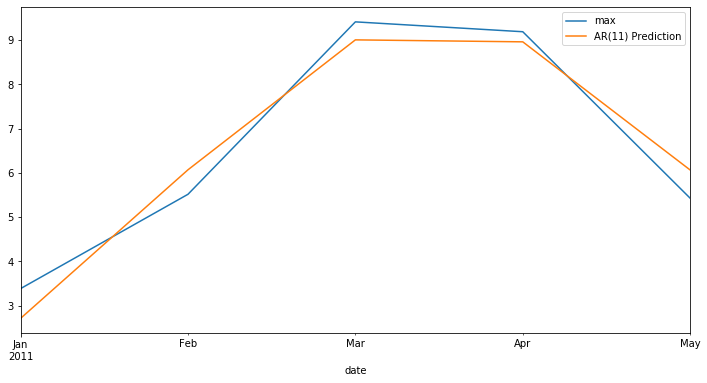

In [57]:
test_data.plot(legend=True)
ARprediction.plot(legend=True,figsize=(12,6));

AR only prediction is not bad since it can capture the mean of test data

#### Evaluating models

In [58]:
# Option 2: Use statsmodels implementations

from statsmodels.tools.eval_measures import mse, rmse, meanabs, aic, bic

In [59]:
mae = meanabs(test_data, ARprediction)

mae

0.49958833936654556

In [60]:
# Akaike information criterion (AIC)
# we seldom compute AIC alone as it is built into many of the statsmodels tools we use

In [61]:
# Bayesian information criterion (BIC)
# we seldom compute BIC alone as it is built into many of the statsmodels tools we use

2. Pyramid ARIMA aka Auto-ARIMA

In [62]:
from pmdarima import auto_arima

In [63]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, exogenous=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=False, error_action='warn', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept=True, sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima``

In [64]:
stepwise_fit = auto_arima(train_data, 
                          start_p=0, start_q=0,
                          max_p=6, max_q=6, 
                          m=12,                    # 12 month season
                          start_P=0, 
                          seasonal=True,
                          d=None, 
                          D=1, 
                          trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

Performing stepwise search to minimize aic
Fit ARIMA: (0, 0, 0)x(0, 1, 1, 12) (constant=True); AIC=485.526, BIC=493.219, Time=0.235 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=True); AIC=492.538, BIC=497.667, Time=0.009 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 12) (constant=True); AIC=399.611, BIC=409.868, Time=0.107 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=414.693, BIC=424.950, Time=0.242 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=False); AIC=492.460, BIC=495.025, Time=0.009 seconds
Fit ARIMA: (1, 0, 0)x(0, 1, 0, 12) (constant=True); AIC=424.170, BIC=431.863, Time=0.024 seconds
Fit ARIMA: (1, 0, 0)x(2, 1, 0, 12) (constant=True); AIC=399.981, BIC=412.803, Time=0.302 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 1, 12) (constant=True); AIC=388.878, BIC=401.699, Time=0.439 seconds
Near non-invertible r

In [65]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  108
Model:             SARIMAX(5, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -179.386
Date:                            Sat, 21 Mar 2020   AIC                            378.773
Time:                                    23:26:17   BIC                            404.416
Sample:                                         0   HQIC                           389.138
                                            - 108                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0314      0.086      0.366      0.714      -0.137       0.200
ar.L1          0.0443      0.187      0.237      0.812      -0.321       0.410
ar.L2          0.4947      0.123      4.016      0.000       0.253       0.736
ar.L3         -0.2079      0.129     -1.605      0.108      -0.462       0.046
ar.L4          0.1492      0.133      1.120      0.263      -0.112       0.410
ar.L5          0.3328      0.117      2.843      0.004       0.103       0.562
ma.L1          0.9390      0.131      7.151      0.000       0.682       1.196
ar.S.L12      -0.0521      0.164     -0.317      0.751      -0.374       0.270
ma.S.L12      -0.9893      3.500     -0.283      0.777      -7.850       5.871
sigma2         1.8200      6.282      0.290      0.772     -10.492      14.132
===================================================================================
Ljung-Box (Q):                       27.01   Jarque-Bera (JB):                 6.38
Prob(Q):                              0.94   Prob(JB):                         0.04
Heteroskedasticity (H):               0.79   Skew:                             0.49
Prob(H) (two-sided):                  0.50   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
from statsmodels.tsa.stattools import adfuller

In [67]:
def adf_test(series, title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [68]:
adf_test(train_data)

Augmented Dickey-Fuller Test: 
ADF test statistic     -2.01811
p-value                 0.27869
# lags used            13.00000
# observations         94.00000
critical value (1%)    -3.50191
critical value (5%)    -2.89282
critical value (10%)   -2.58345
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [69]:
# apply the first different
from statsmodels.tsa.statespace.tools import diff

In [70]:
diff_df = diff(train_data, k_diff=5)

In [71]:
diff_df.head()

date
2002-06-01    -1.57887
2002-07-01     5.71801
2002-08-01   -12.31667
2002-09-01    -0.11183
2002-10-01    12.48441
Freq: MS, Name: max, dtype: float64

In [72]:
adf_test(diff_df)

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.44500
p-value                 0.00000
# lags used            11.00000
# observations         91.00000
critical value (1%)    -3.50434
critical value (5%)    -2.89387
critical value (10%)   -2.58401
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [73]:
# fit model
model = ARIMA(train_data, order=(5,0,1))
results = model.fit()

In [74]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    max   No. Observations:                  108
Model:                     ARMA(5, 1)   Log Likelihood                -207.682
Method:                       css-mle   S.D. of innovations              1.606
Date:                Sat, 21 Mar 2020   AIC                            431.363
Time:                        23:26:17   BIC                            452.820
Sample:                    01-01-2002   HQIC                           440.063
                         - 12-01-2010                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8645      0.823      7.127      0.000       4.252       7.477
ar.L1.max      0.2907      0.083      3.491      0.000       0.127       0.454
ar.L2.max      0.3781      0.087      4.359      0.000       0.208       0.548
ar.L3.max     -0.6688      0.070     -9.528      0.000      -0.806      -0.531
ar.L4.max      0.1688      0.088      1.907      0.057      -0.005       0.342
ar.L5.max      0.4757      0.085      5.620      0.000       0.310       0.642
ma.L1.max      1.0000      0.042     23.992      0.000       0.918       1.082
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1307           -0.0000j            1.1307           -0.0000
AR.2            0.5033           -0.9288j            1.0564           -0.1710
AR.3            0.5033           +0.9288j            1.0564            0.1710
AR.4           -1.2461           -0.3368j            1.2908           -0.4580
AR.5           -1.2461           +0.3368j            1.2908            0.4580
MA.1           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

In [75]:
# predict
predictions = results.predict(start=start, end=end,
                              dynamic=False,
                              typ='levels'  # linear: return in differences; levels: return in original form
                              ).rename('ARIMA Predictions')

In [76]:
predictions.head()

2011-01-01    4.60375
2011-02-01   10.07350
2011-03-01   11.06264
2011-04-01    7.93508
2011-05-01    3.38304
Freq: MS, Name: ARIMA Predictions, dtype: float64

In [77]:
predictions.tail()

2011-01-01    4.60375
2011-02-01   10.07350
2011-03-01   11.06264
2011-04-01    7.93508
2011-05-01    3.38304
Freq: MS, Name: ARIMA Predictions, dtype: float64

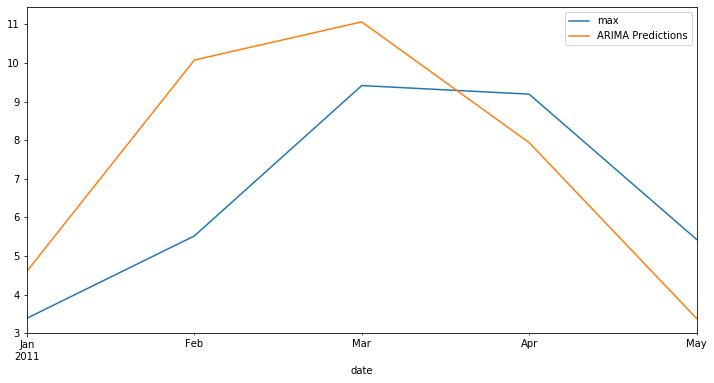

In [78]:
# plot
test_data.plot(legend=True)
predictions.plot(legend=True,figsize=(12,6));

3. Seasonal ARIMA

In [79]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [80]:
model = SARIMAX(train_data,order=(5,0,1),seasonal_order=(1,1,1,12))  # seasonal
#model = SARIMAX(train_data,order=(3,1,1))  # non seasonal
results = model.fit()

/home/kenneth/anaconda3/envs/salinization/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [81]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                max   No. Observations:                  108
Model:             SARIMAX(5, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -179.486
Date:                            Sat, 21 Mar 2020   AIC                            376.972
Time:                                    23:26:18   BIC                            400.051
Sample:                                01-01-2002   HQIC                           386.301
                                     - 12-01-2010                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0454      0.180      0.253      0.801      -0.307       0.398
ar.L2          0.4948      0.124      4.003      0.000       0.253       0.737
ar.L3         -0.2063      0.129     -1.603      0.109      -0.458       0.046
ar.L4          0.1467      0.131      1.124      0.261      -0.109       0.403
ar.L5          0.3286      0.115      2.859      0.004       0.103       0.554
ma.L1          0.9383      0.129      7.263      0.000       0.685       1.192
ar.S.L12      -0.0543      0.162     -0.335      0.737      -0.372       0.263
ma.S.L12      -0.9972     13.493     -0.074      0.941     -27.443      25.449
sigma2         1.8038     24.258      0.074      0.941     -45.741      49.348
===================================================================================
Ljung-Box (Q):                       26.82   Jarque-Bera (JB):                 6.40
Prob(Q):                              0.95   Prob(JB):                         0.04
Heteroskedasticity (H):               0.78   Skew:                             0.49
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
predictions = results.predict(start=start, end=end, 
                              dynamic=False,  # dynamic=False means that forecasts at each point are generated using the full history up to that point (all lagged values). 
                              typ='levels'  # typ='levels' predicts the levels of the original endogenous variables. If we'd used the default typ='linear' we would have seen linear predictions in terms of the differenced endogenous variables
                             ).rename('SARIMAX Predictions')

In [83]:
predictions.head()

2011-01-01    2.80213
2011-02-01    6.60463
2011-03-01    9.53235
2011-04-01   10.35798
2011-05-01    7.38482
Freq: MS, Name: SARIMAX Predictions, dtype: float64

In [84]:
predictions.tail()

2011-01-01    2.80213
2011-02-01    6.60463
2011-03-01    9.53235
2011-04-01   10.35798
2011-05-01    7.38482
Freq: MS, Name: SARIMAX Predictions, dtype: float64

In [85]:
test_df = pd.read_csv(f'../../dataset/final/stations/{station_code}.csv', parse_dates=['date'])
test_df.set_index('date', inplace=True)
test_df.index.freq = 'D'
test_df.index
test_df.sort_index(inplace=True)

test_df = test_df[(test_df.index.year >= 2011) & (test_df.index.year <= test_year)]
test_df = test_df[f'2011-01-01':f'{test_year}-05-31']
test_data = test_df[value_field].resample('MS').mean()
test_data.head()

date
2011-01-01   3.38710
2011-02-01   5.51786
2011-03-01   9.41290
2011-04-01   9.19000
2011-05-01   5.42903
Freq: MS, Name: max, dtype: float64

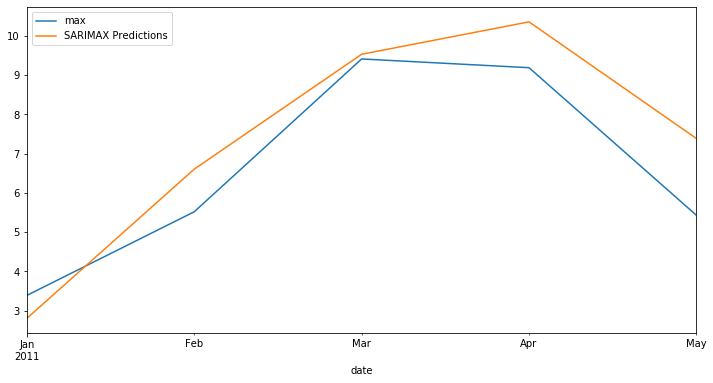

In [86]:
test_data.plot(legend=True)
predictions.plot(legend=True,figsize=(12,6));

MSE/RMSE for ARIMA/SARIMAX